## Лаб.08 PCA кластеризация

### Кластеризация с применением метода главных компонент

---

#### Входные данные:
Датасет `X_train.txt`, `X_test.txt`, `y_train.txt`, `y_test.txt`

#### Задание:
Имеется база с данными о перемещениях пользователей мобильных телефонов, которые используются для детектирования падений. На начальном этапе необходимо научить систему различать разные типы движений пользователей. В датасете имеются разметки для состояния пользователя телефона: 

1 – ходьба, 2 – подъем вверх по лестнице, 3 – спуск по лестнице, 4 – сидя, 5 – стоя, 6 – лежа.

Напишите программный код для кластеризации пользователей по типу движения с применением понижения размерности. Обучить алгоритмы кластеризации двумя методами на исходных и редуцированных данных, сравнить результаты кластеризации.


**Порядок выполнения работы:**
1. Загрузите данные в датафрейм при помощи функции `np.loadtxt`. Измените тип данных на `int` при помощи метода `astype()`. Выведите размерности для контроля.
2. Поскольку в данной задаче тренировочная выборка не нужна, объедините `X_train` с `X_test`, а `y_train` с `y_test`.
3. Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.
4. С помощью PCA понизьте размерность, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте `random_state`.
5. Выведите минимальное число компонент.
6. Выведите процент дисперсии, который приходится на первую главную компоненту.
7. Визуализируйте данные в проекции на первые две главные компоненты. Какие виды движений входят в кластеры, хорошо отделенные друг от друга?
8. Обучите кластеризацию данных методом `KMeans` на данных со сниженной за счет PCA размерностью. Параметры:<br>`n_clusters = n_classes` (число уникальных меток целевого класса, определите при помощи `np.unique(y)`), `n_init = 100, random_state = 17` (для воспроизводимости результата).
9. Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.
10. Для того, чтобы установить соответствие между метками кластеров и исходными метками классов, воспользуйтесь следующим кодом:<br>`tt = pd.crosstab(y, cluster_labels, margins=True)`<br>`tt.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидя', 'стоя', 'лежа', 'все']`<br>`tt.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']`<br>`tt`
11. Определите максимальную долю объектов в классе, отнесенных к какому-то одному кластеру.
12. Выберите оптимальное количество кластеров при помощи параметра `inertia`. Параметры алгоритма и данные использовать те же, что раньше (меняем только `n_clusters`).
13. Обучите кластеризацию данных методом `AgglomerativeClustering` на данных со сниженной за счет PCA размерностью.
14. Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans`.

---

1. Загрузите данные в датафрейм при помощи функции `np.loadtxt`. <del>Измените тип данных на int при помощи метода astype()</del>. Выведите размерности для контроля.

In [ ]:
# подключим необходимые библиотеки

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# data: X_train.txt, X_test.txt, y_train.txt, y_test.txt
# load data into the dataframe using the np.loadtxt function, then change the 
# data type to int using the astype() method. Output dimensions for control

# use these lines if on Jupyter
# X_train = np.loadtxt('X_train.txt')
# X_test = np.loadtxt('X_test.txt')
# y_train = np.loadtxt('y_train.txt')
# y_test = np.loadtxt('y_test.txt')

# use these lines if on Colab
X_train = np.loadtxt('gdrive/My Drive/Colab Notebooks/data/X_train.txt', encoding="UTF-8") #encoding ANSI
X_test = np.loadtxt('gdrive/My Drive/Colab Notebooks/data/X_test.txt', encoding="UTF-8")
y_train = np.loadtxt('gdrive/My Drive/Colab Notebooks/data/y_train.txt', encoding="UTF-8")
y_test = np.loadtxt('gdrive/My Drive/Colab Notebooks/data/y_test.txt', encoding="UTF-8")

# X_train = X_train.astype(int)
# X_test = X_test.astype(int)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 561)
(2947, 561)
(7352,)
(2947,)


---

2. Поскольку в данной задаче тренировочная выборка не нужна, объедините `X_train` с `X_test`, а `y_train` с `y_test`.

In [ ]:
# since no training sample is needed in this problem, combine X_train with X_test and y_train with y_test

X = np.concatenate((X_train, X_test), axis=0) # also method vstack can be used 
y = np.concatenate((y_train, y_test), axis=0) # also method hstack can be used

print(X.shape)
print(y.shape)

(10299, 561)
(10299,)


---

3. Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [ ]:
# scale the sample using the StandardScaler with default options

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

4. С помощью PCA понизьте размерность, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте `random_state`.

In [ ]:
# use PCA to downsize, leaving as many components as needed to explain at least 90% of 
# the variance in the original (scaled) data. use scaled sampling and fix random_state

from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=0)
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

(10299, 65)


---

5. Выведите минимальное число компонент.

In [ ]:
# output the minimum number of components

print(pca.n_components_)
print(pca.explained_variance_ratio_.sum())

65
0.9004833346822927


---

6. Выведите процент дисперсии, который приходится на первую главную компоненту.

In [ ]:
# output the percentage of variance that falls on the first principal component

print(pca.explained_variance_ratio_[0])

0.5073822103501335


---

7. Визуализируйте данные в проекции на первые две главные компоненты. Какие виды движений входят в кластеры, хорошо отделенные друг от друга?

In [ ]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

In [ ]:
# cdict = {1: 'red', 2: 'blue', 3: 'green', 4: 'black', 5: 'yellow', 6: 'violet'}
# markk = {1: '.', 2: ',', 3: 'o', 4: 'v', 5: '^', 6: '*'}
# group = np.unique(y)

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
# for g in np.unique(y):
#     ix = np.where(group == g)
#     ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cdict[g], marker=markk[g], alpha=1.0, label=g)
# ax.legend()
# plt.show()

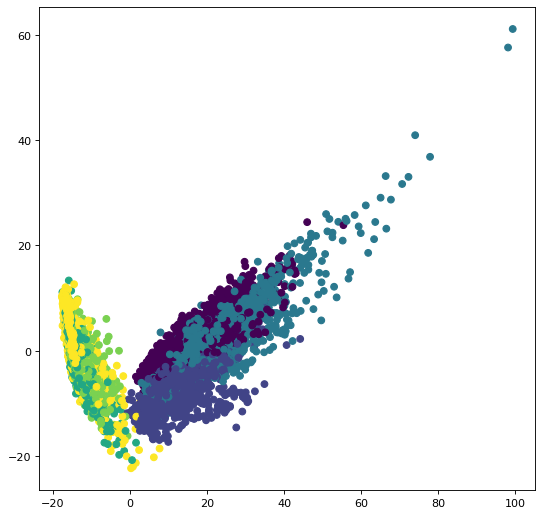

In [ ]:
# visualize the data in terms of the first two principal components. what types of 
# movements are included in clusters that are well separated from each other?

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show();

---

8. Обучите кластеризацию данных методом `KMeans` на данных со сниженной за счет PCA размерностью. Параметры:<br>`n_clusters = n_classes` (число уникальных меток целевого класса, определите при помощи `np.unique(y)`), `n_init = 100, random_state = 17` (для воспроизводимости результата).

In [ ]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

In [ ]:
# train data clustering using KMeans on PCA-reduced data. Options: n_clusters = n_classes (number of unique labels 
# of the target class, determine with np.unique(y)), n_init = 100, random_state = 17 (for reproducible results)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=100, random_state=17)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

---

9. Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

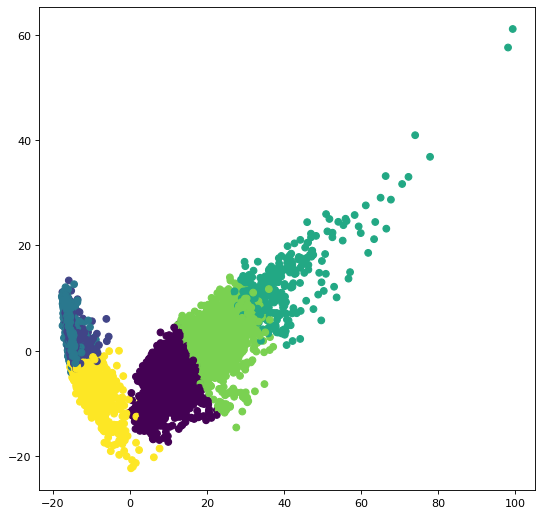

In [ ]:
# visualize the data in terms of the first two principal components. color the points according to the obtained cluster labels

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show();

---

10. Для того, чтобы установить соответствие между метками кластеров и исходными метками классов, воспользуйтесь следующим кодом:<br>`tt = pd.crosstab(y, cluster_labels, margins=True)`<br>`tt.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидя', 'стоя', 'лежа', 'все']`<br>`tt.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']`<br>`tt`

In [ ]:
# in order to establish a correspondence between the cluster labels and the original class labels, use the following code:

tt = pd.crosstab(y, kmeans.labels_, margins=True)
tt.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидя', 'стоя', 'лежа', 'все']
tt.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tt

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,903,0,0,78,741,0,1722
подъем вверх по лестнице,1241,0,0,5,296,2,1544
спуск по лестнице,320,0,0,196,890,0,1406
сидя,1,1235,91,0,0,450,1777
стоя,0,1344,0,0,0,562,1906
лежа,5,52,1558,0,0,329,1944
все,2470,2631,1649,279,1927,1343,10299


---

11. Определите максимальную долю объектов в классе, отнесенных к какому-то одному кластеру.

In [ ]:
# determine the maximum proportion of objects in the class that belong to any one cluster

tt.loc['все', 'cluster1'].max() / tt.loc['все', 'все']

0.23982910962229342

---

12. Выберите оптимальное количество кластеров при помощи параметра `inertia`. Параметры алгоритма и данные использовать те же, что раньше (меняем только `n_clusters`).

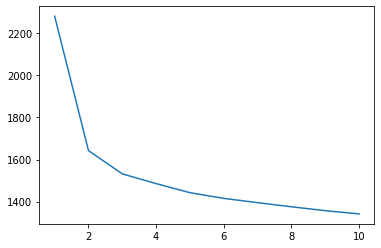

In [ ]:
# choose the optimal number of clusters using the inertia parameter. the algorithm 
# parameters and data are the same as before (we change only n_clusters)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=17)
    kmeans.fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia)
plt.show();

---

13. Обучите кластеризацию данных методом `AgglomerativeClustering` на данных со сниженной за счет PCA размерностью.

In [ ]:
# train data clustering using the AgglomerativeClustering method on PCA-reduced data

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6)
agg.fit(X_pca)

AgglomerativeClustering(n_clusters=6)

In [ ]:
# in order to establish a correspondence between the cluster labels and the original class labels, use the following code:

tt = pd.crosstab(y, agg.labels_, margins=True)
tt.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидя', 'стоя', 'лежа', 'все']
tt.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tt

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,800,0,896,26,0,0,1722
подъем вверх по лестнице,337,0,1207,0,0,0,1544
спуск по лестнице,1144,0,138,124,0,0,1406
сидя,0,1559,0,0,71,147,1777
стоя,0,1832,0,0,0,74,1906
лежа,0,74,0,0,1604,266,1944
все,2281,3465,2241,150,1675,487,10299


In [ ]:
# train data clustering using the AgglomerativeClustering method on PCA-reduced data

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_pca)

AgglomerativeClustering()

In [ ]:
# in order to establish a correspondence between the cluster labels and the original class labels, use the following code:

tt = pd.crosstab(y, agg.labels_, margins=True)
tt.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидя', 'стоя', 'лежа', 'все']
tt.columns = ['cluster' + str(i + 1) for i in range(2)] + ['все']
tt

,cluster1,cluster2,все
ходьба,1722,0,1722
подъем вверх по лестнице,1544,0,1544
спуск по лестнице,1406,0,1406
сидя,0,1777,1777
стоя,0,1906,1906
лежа,0,1944,1944
все,4672,5627,10299


---

14. Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans`.

In [ ]:
# calculate the Adjusted Rand Index (sklearn.metrics) for the resulting clustering and for KMeans

from sklearn.metrics import adjusted_rand_score

print(adjusted_rand_score(y, kmeans.labels_))
print(adjusted_rand_score(y, agg.labels_))

0.42942059125813775
0.33253220715485143
